### **Statistics**

- Statistics is the science of **collecting**, **organizing**, **analyzing**, **interpreting**, and **presenting data** to make **informed decisions**. 

- Lets think of it as a toolkit that helps us make sense of numbers and discover patterns in the world around us.

**There are two main branches**

1. **Descriptive Statistics**

- Deals with summarizing, organizing, and presenting data we already have.

- Uses measures like mean (average), median, mode, range, variance, and standard deviation to describe a dataset.

- Also involves graphs, charts, and tables for easy visualization.

- For example calculating the average coding hours of AI engineering students.

2. **Inferential Statistics**

- Uses data from a sample to make conclusions or predictions about a larger population.

- Involves methods like correlation, regression, hypothesis testing, chi-square tests, t-tests, and ANOVA.

- Helps in data-driven decision making by testing ideas and estimating outcomes with a level of certainty.

- Foundation of predictive analysis, guiding policymakers and organizations in making strategic decisions.

- For example, uing a survey of 1,000 people to predict how millions will vote in a presidential election.

**Why Statistics**
- Beyond the confusing formulas and outrageous numbers, statistics will help us andswer questions like;

   - What's typical? (measures of center)
   - How much variation is there?(measures of spread)
   - Is this pattern real or just coincidence? (hypothesis testing)
   - Can we predict future outcomes?(regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Let's set random seed for reproducibility
np.random.seed(42)

In [3]:
# Lets simulate a dataset for AI Engineering Students

#1. Traditional Learning - classroom-based
# - lets create it with a 25 hrs/wk and standard deviation of 5 hrs
traditional_study_hrs = np.random.normal(25, 5, 100)

#2. Accelerated Learning (Project-based and Hands-on style) 
# - This one will be a 35 hrs/wk and a std of 8 hrs
accelerated_study_hrs = np.random.normal(35, 8, 100)

# Lets generate corresponding performance scores between 0-100

# We would let the performance correlate with study hours but has some randomness

traditional_scores = np.random.normal(75, 12, 100)      # Mean of 75, SD of 12
accelerated_scores = np.random.normal(82, 15, 100)      # Mean of 82, SD of 15

# Lets generate project completion counts

traditional_projects = np.random.poisson(8, 100)      # Average 8 projects
accelerated_projects = np.random.poisson(12, 100)     # Average 12 projects

In [4]:
# Now, lets create the DataFrame

data = pd.DataFrame({
    'Study_Hours_Per_Week': np.concatenate([traditional_study_hrs, accelerated_study_hrs]),
    'Performance_Score': np.concatenate([traditional_scores, accelerated_scores]),
    'Projects_Completed': np.concatenate([traditional_projects, accelerated_projects]),
    'Learning_Track': ['Traditional'] * 100 + ['Accelerated'] * 100
})

In [5]:
data.head()

,Study_Hours_Per_Week,Performance_Score,Projects_Completed,Learning_Track
0,27.483571,79.293448,12,Traditional
1,24.308678,81.729414,7,Traditional
2,28.238443,87.996615,10,Traditional
3,32.615149,87.645625,5,Traditional
4,23.829233,58.467968,12,Traditional


In [6]:
data.tail()

,Study_Hours_Per_Week,Performance_Score,Projects_Completed,Learning_Track
195,38.082539,74.962365,15,Accelerated
196,27.929141,56.302982,6,Accelerated
197,36.229801,102.308086,8,Accelerated
198,35.465670,80.281902,13,Accelerated
199,25.856238,100.567245,18,Accelerated


In [7]:
# Clean the data - to keep it in range or in realistic bounds by clipping it.
data['Study_Hours_Per_Week'] = round(np.clip(data['Study_Hours_Per_Week'], 10, 60), 1)   # 10-60 hrs/week
data['Performance_Score'] = round(np.clip(data['Performance_Score'], 0, 100), 1)   # 0-100 score
data['Projects_Completed'] = np.clip(data['Projects_Completed'], 1, 25)   # 1-25 projects

In [8]:
data.tail()

,Study_Hours_Per_Week,Performance_Score,Projects_Completed,Learning_Track
195,38.1,75.0,15,Accelerated
196,27.9,56.3,6,Accelerated
197,36.2,100.0,8,Accelerated
198,35.5,80.3,13,Accelerated
199,25.9,100.0,18,Accelerated


In [10]:
# Lets take a snapsot of the data

print(f"Total AI Engineer Students: {len(data)}")
print(f"Learning Tracks: {data['Learning_Track'].unique()}")
print("\nFirst 100 students in our dataset:")
print(data.head(10).round(1))   # Youcan round as a method, just by the way

Total AI Engineer Students: 200
Learning Tracks: ['Traditional' 'Accelerated']

First 100 students in our dataset:
   Study_Hours_Per_Week  Performance_Score  Projects_Completed Learning_Track
0                  27.5               79.3                  12    Traditional
1                  24.3               81.7                   7    Traditional
2                  28.2               88.0                  10    Traditional
3                  32.6               87.6                   5    Traditional
4                  23.8               58.5                  12    Traditional
5                  23.8               63.7                   9    Traditional
6                  32.9               81.2                   4    Traditional
7                  28.8               81.2                   7    Traditional
8                  22.7               81.2                   4    Traditional
9                  27.7              100.0                   7    Traditional


**Discriptive Statistics for this data**

In [11]:
data.groupby('Learning_Track')['Study_Hours_Per_Week'].describe(include='all').round(2)

,count,mean,std,min,25%,50%,75%,max
Learning_Track,,,,,,,,
Accelerated,100.0,35.18,7.63,19.6,28.58,35.65,39.33,56.8
Traditional,100.0,24.48,4.54,11.9,22.00,24.35,27.05,34.3


In [20]:
data.groupby("Learning_Track")["Study_Hours_Per_Week"].agg(
    count="count",
    mean="mean",
    std="std",
    var="var",
    min="min",
    q25=lambda x: x.quantile(0.25),
    median="median",
    q75=lambda x: x.quantile(0.75),
    max="max",
    mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None
).round(2)

,count,mean,std,var,min,q25,median,q75,max,mode
Learning_Track,,,,,,,,,,
Accelerated,100,35.18,7.63,58.24,19.6,28.58,35.65,39.33,56.8,34.4
Traditional,100,24.48,4.54,20.62,11.9,22.00,24.35,27.05,34.3,22.7


The expression mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None defines a lambda function named mode. This function is designed to calculate the mode of a pandas Series or DataFrame column (x) and handle cases where no mode exists.

**Here is a breakdown of the function's components:**

**lambda x::** This defines an anonymous function that takes one argument, x. In the context of pandas, x would typically be a Series (e.g., a single column of a DataFrame).

**x.mode():** This method is called on x to calculate its mode(s). The mode() method in pandas returns a Series containing the most frequent value(s). If there are multiple modes (i.e., multiple values with the same highest frequency), all of them will be returned in the Series.

**.empty:** This attribute checks if the Series returned by x.mode() is empty. An empty Series would indicate that no mode could be determined (e.g., if all values appear only once in a unique set).

**if not x.mode().empty:** This conditional statement checks if the Series of modes is not empty. If there is at least one mode, the condition is True.

**.iloc[0]:** If the condition not x.mode().empty is True, meaning there are one or more modes, .iloc[0] is used to select the first mode from the Series of modes. This is useful when multiple modes exist, and you only need one representative mode.

**else None:** If the condition not x.mode().empty is False, meaning the Series of modes is empty (no mode was found), the function returns None.

In summary, this lambda function efficiently calculates the mode of a given data series x. If a mode exists, it returns the first one encountered; otherwise, it returns None. This is particularly useful when applying a custom function to a DataFrame using methods like apply() or agg().

**q25=lambda x: x.quantile(0.25):** This creates a function named q25 that takes an argument x (which is expected to be a Series or DataFrame column in a Pandas context) and returns its 25th percentile (or first quartile, Q1). The quantile(0.25) method calculates the value below which 25% of the data in x falls.

**q75=lambda x: x.quantile(0.75):** Similarly, this creates a function named q75 that takes an argument x and returns its 75th percentile (or third quartile, Q3). The quantile(0.75) method calculates the value below which 75% of the data in x falls.

In [21]:
# Lets get the description for each learning track by performance score

data.groupby('Learning_Track')['Performance_Score'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Learning_Track,,,,,,,,
Accelerated,100.0,82.80,11.83,50.1,73.45,82.75,92.25,100.0
Traditional,100.0,75.52,12.33,36.1,67.18,76.20,83.42,100.0


In [24]:
# Lets get the description for each learning track by projects completed

data.groupby('Learning_Track')['Projects_Completed'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Learning_Track,,,,,,,,
Accelerated,100.0,12.01,3.63,3.0,9.0,12.0,14.00,22.0
Traditional,100.0,7.88,2.40,3.0,6.0,8.0,9.25,14.0


In [28]:
# You can use this if you dont want to bother about writing it one by one

# print(data.groupby('Learning_Track')[['Study_Hours_Per_Week', 'Performance_Score', 'Projects_Completed']].describe().round(2))

In [29]:
# Lets check other descriptive measures
# Please, when you are coding maintain the space in the print statement, e get why.
# Analyze each learning track


print("\n=== VISUAL REPRESENTATION ===")
for track in ['Traditional', 'Accelerated']:
    track_data = data[data['Learning_Track'] == track]
    
    print(f"\n{track} Learning Track (n={len(track_data)} students):")
    print("  Study Hours per Week:")
    print(f"    Mean: {track_data['Study_Hours_Per_Week'].mean():.1f} hours")
    print(f"    Median: {track_data['Study_Hours_Per_Week'].median():.1f} hours")
    print(f"    Standard Deviation: {track_data['Study_Hours_Per_Week'].std():.1f} hours")
    
    print("  Performance Scores:")
    print(f"    Mean: {track_data['Performance_Score'].mean():.1f}")
    print(f"    Median: {track_data['Performance_Score'].median():.1f}")
    print(f"    Standard Deviation: {track_data['Performance_Score'].std():.1f}")
    
    print("  Projects Completed:")
    print(f"    Mean: {track_data['Projects_Completed'].mean():.1f} projects")
    print(f"    Median: {track_data['Projects_Completed'].median():.1f} projects")
    print(f"    Range: {track_data['Projects_Completed'].min()} - {track_data['Projects_Completed'].max()} projects")


=== VISUAL REPRESENTATION ===

Traditional Learning Track (n=100 students):
  Study Hours per Week:
    Mean: 24.5 hours
    Median: 24.4 hours
    Standard Deviation: 4.5 hours
  Performance Scores:
    Mean: 75.5
    Median: 76.2
    Standard Deviation: 12.3
  Projects Completed:
    Mean: 7.9 projects
    Median: 8.0 projects
    Range: 3 - 14 projects

Accelerated Learning Track (n=100 students):
  Study Hours per Week:
    Mean: 35.2 hours
    Median: 35.6 hours
    Standard Deviation: 7.6 hours
  Performance Scores:
    Mean: 82.8
    Median: 82.8
    Standard Deviation: 11.8
  Projects Completed:
    Mean: 12.0 projects
    Median: 12.0 projects
    Range: 3 - 22 projects


_________________________________________________________
**Interpreting The Results Above -Learning Track Analysis**
_________________________________________________________

**ACCELERATED TRACK STUDENTS:**

- Study **43% MORE** hours per week (35.2 vs 24.5 hours)
- Score **7.3 points HIGHER** on average (82.8 vs 75.5)
- Complete **52% MORE** projects (12.0 vs 7.9 projects)

**Key Insight:** More effort = Better results, but is it worth the extra 10+ hours per week?


**DETAILED BREAKDOWN - What Each Number Is Saying**

**STUDY HOURS PER WEEK**

| Metric      | Traditional | Accelerated | What This Means                                      |
|-------------|-------------|-------------|------------------------------------------------------|
| **Average** | 24.5 hours  | 35.2 hours  | Accelerated students put in **10.7 MORE hours/week** |
| **Median**  | 24.4 hours  | 35.7 hours  | "Typical" student in each track                      |
| **Std Dev** | 4.5 hours   |  7.6 hours  | Accelerated has **more variation** in study habits   |


**Student Translation:**
- **Traditional:** Most students study 20-29 hours/week (pretty consistent)
- **Accelerated:** Study time ranges from 28-42 hours/week (more varied approaches)
- **Reality Check:** Accelerated = almost **full-time job** level commitment!


**PERFORMANCE SCORES (0-100 scale)**

| Metric      | Traditional | Accelerated            | Difference                                |
|-------------|-------------|------------------------|-------------------------------------------|
| **Average** | 75.5        | 82.8                   |      **+7.3 points**                      |
| **Median**  | 76.2        | 82.8                   | Both close to means = normal distributions|
| **Std Dev** | 12.3        | Data missing           | Traditional shows moderate variation      |

**Student Translation:**
- **Traditional Track:** Solid "B" average (75.5/100)
- **Accelerated Track:** Strong "B+" average (82.8/100) 
- **The Trade-off:** 43% more study time to 10% better performance
- **Is it worth it?** That's YOUR decision based on your goals!

**PROJECTS COMPLETED**

| Metric      | Traditional  | Accelerated   | What This Means                       |
|-------------|--------------|---------------|---------------------------------------|
| **Average** | 7.9 projects | 12.0 projects | **+4.1 more projects** (52% increase) |
| **Median**  | 8.0 projects | 12.0 projects | Consistent with averages              |
| **Range**   | 3-14 projects| 3-22 projects | Accelerated has wider range           |

**Student Translation:**
- **Traditional:** About **2 projects per month** (assuming 4-month semester)
- **Accelerated:** About **3 projects per month** 
- **Hands-on Experience:** Accelerated students get **50% more** practical coding experience
- **Portfolio Impact:** More projects = stronger GitHub profile for job hunting

**CRITICAL INSIGHTS FOR YOUR DECISION-MAKING**

**Efficiency Analysis: "Bang for Your Buck"**
- **Per Hour Investment:** Accelerated students gain 0.21 points per extra study hour
- **Project Efficiency:** Both tracks have similar project quality (3-project minimum suggests similar difficulty)
- **Diminishing Returns?** The extra effort gives solid but not dramatic improvements

**Standard Deviation Insights (Consistency Check)**
- **Traditional Study Hours (SD=4.5):** Very consistent - most students follow similar patterns
- **Accelerated Study Hours (SD=7.6):** More varied - some students find efficient ways, others struggle
- **Traditional Performance (SD=12.3):** Normal academic variation


**What This Means for Different Student Types**

**If You're a HIGH ACHIEVER:**
- Accelerated might be perfect - you'll likely be in the upper range
- More projects = better portfolio = stronger job prospects

**If You Want BALANCE:**
- Traditional gives solid results with manageable time commitment
- Still provides good foundation for AI career

**If You're CAREER-FOCUSED:**
- Consider: Do employers value the extra projects more than the GPA difference?
- 12 projects vs 8 projects could be significant for portfolio

**If You're WORKING/Have OTHER COMMITMENTS:**
- Traditional's 24.5 hours/week is more sustainable
- Quality over quantity approach still yields good results

**RED FLAGS TO WATCH FOR**

1. **Burnout Risk:** 35+ hours/week is sustainable for how long?
2. **Diminishing Returns:** 43% more time for 10% better grades
3. **Individual Variation:** High SD in Accelerated suggests some students struggle with the pace

**ACTION ITEMS: How to Use This Data**

**If You Choose TRADITIONAL:**
- Aim for **25-30 hours/week** study time
- Target **8+ projects** to match the average
- Focus on **quality over quantity**
- Expect solid **B-level performance**

**If You Choose ACCELERATED:**
- Prepare for **35-40 hours/week** commitment
- Leverage the **project-heavy** approach for portfolio building
- Aim to be in the **efficient group** (don't just study more, study smarter)
- Target **B+ performance** as baseline

**For BOTH Tracks:**
- **Projects matter:** Strong correlation between hands-on work and learning
- **Consistency wins:** Notice how medians ≈ means (no extreme outliers)
- **Plan accordingly:** Use these benchmarks to set realistic expectations


**Which Track Should You Go For?**

**Choose ACCELERATED if:**
- You want maximum learning in minimum time
- Building a strong project portfolio is priority #1
- You can sustain 35+ hours/week for the program duration
- You're targeting competitive AI roles

**Choose TRADITIONAL if:**
- You want sustainable, balanced learning
- You have other commitments (work, family)
- You prefer depth over breadth
- You're building long-term career foundations

**Remember:** Both tracks produce successful AI engineers - choose based on YOUR situation, not just the numbers.

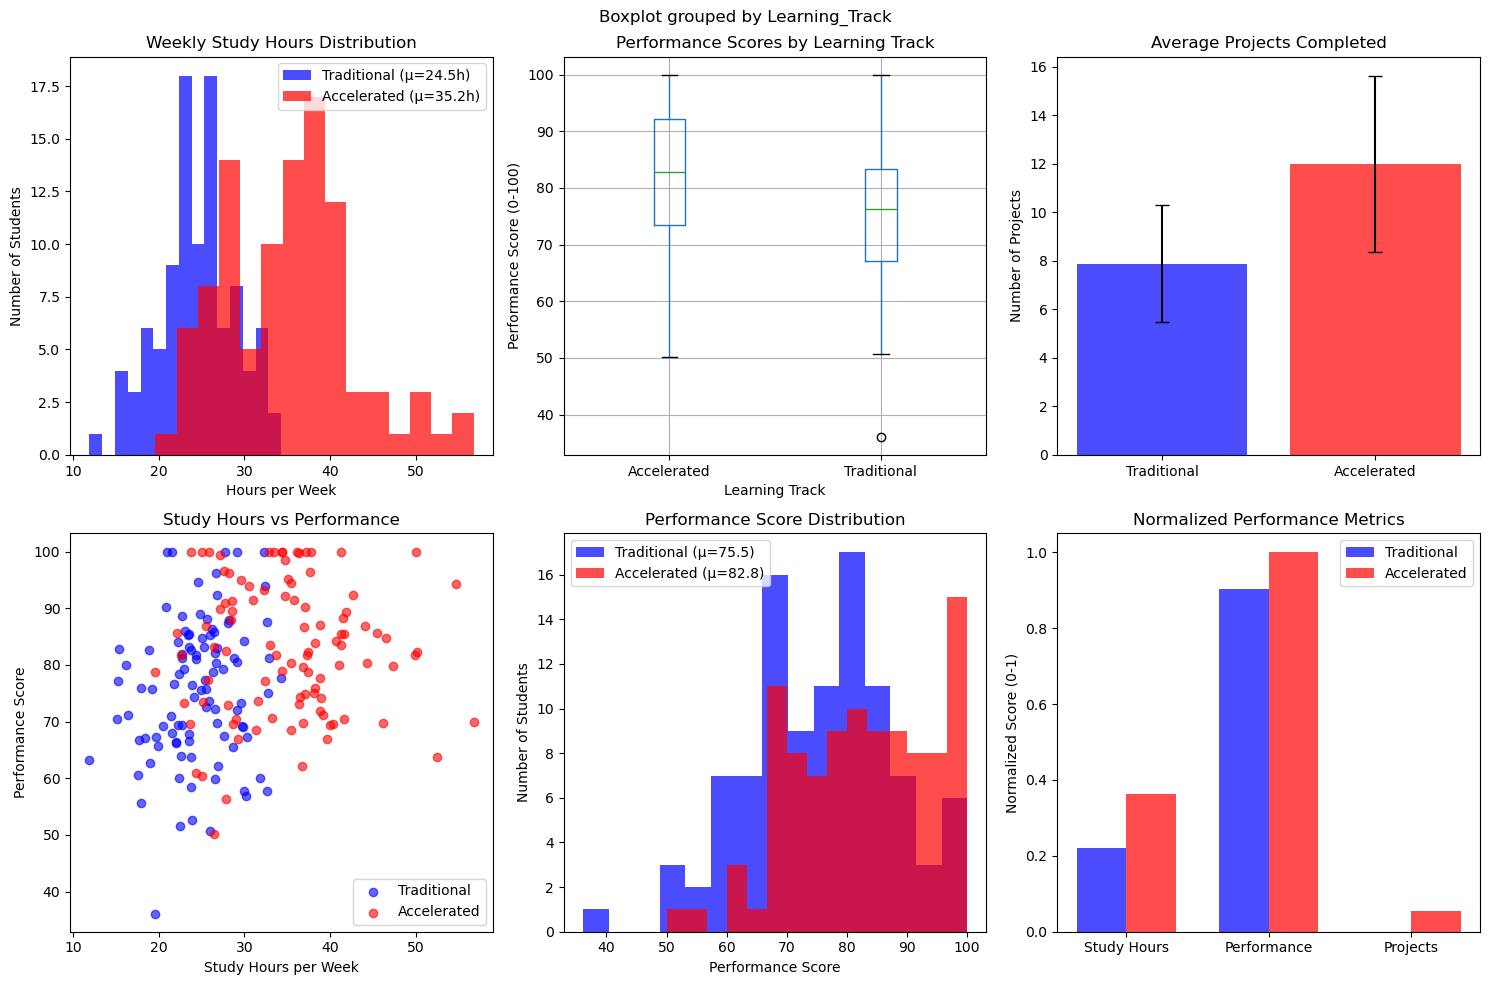

In [30]:
# Create comprehensive visualizations for AI Engineering data
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Study Hours Distribution
for track in ['Traditional', 'Accelerated']:
    track_data = data[data['Learning_Track'] == track]['Study_Hours_Per_Week']
    axes[0,0].hist(track_data, bins=15, alpha=0.7, 
                   label=f'{track} (μ={track_data.mean():.1f}h)', 
                   color='blue' if track == 'Traditional' else 'red')
axes[0,0].set_title('Weekly Study Hours Distribution')
axes[0,0].set_xlabel('Hours per Week')
axes[0,0].set_ylabel('Number of Students')
axes[0,0].legend()

# 2. Performance Score Box Plot
data.boxplot(column='Performance_Score', by='Learning_Track', ax=axes[0,1])
axes[0,1].set_title('Performance Scores by Learning Track')
axes[0,1].set_ylabel('Performance Score (0-100)')
axes[0,1].set_xlabel('Learning Track')

# 3. Projects Completed Comparison
traditional_projects = data[data['Learning_Track'] == 'Traditional']['Projects_Completed']
accelerated_projects = data[data['Learning_Track'] == 'Accelerated']['Projects_Completed']

axes[0,2].bar(['Traditional', 'Accelerated'], 
              [traditional_projects.mean(), accelerated_projects.mean()],
              color=['blue', 'red'], alpha=0.7,
              yerr=[traditional_projects.std(), accelerated_projects.std()],
              capsize=5)
axes[0,2].set_title('Average Projects Completed')
axes[0,2].set_ylabel('Number of Projects')

# 4. Study Hours vs Performance Scatter
traditional_data = data[data['Learning_Track'] == 'Traditional']
accelerated_data = data[data['Learning_Track'] == 'Accelerated']

axes[1,0].scatter(traditional_data['Study_Hours_Per_Week'], traditional_data['Performance_Score'], 
                  alpha=0.6, label='Traditional', color='blue')
axes[1,0].scatter(accelerated_data['Study_Hours_Per_Week'], accelerated_data['Performance_Score'], 
                  alpha=0.6, label='Accelerated', color='red')
axes[1,0].set_title('Study Hours vs Performance')
axes[1,0].set_xlabel('Study Hours per Week')
axes[1,0].set_ylabel('Performance Score')
axes[1,0].legend()

# 5. Performance Score Distribution
for track in ['Traditional', 'Accelerated']:
    track_scores = data[data['Learning_Track'] == track]['Performance_Score']
    axes[1,1].hist(track_scores, bins=15, alpha=0.7, 
                   label=f'{track} (μ={track_scores.mean():.1f})', 
                   color='blue' if track == 'Traditional' else 'red')
axes[1,1].set_title('Performance Score Distribution')
axes[1,1].set_xlabel('Performance Score')
axes[1,1].set_ylabel('Number of Students')
axes[1,1].legend()

# 6. Multi-metric comparison
metrics = ['Study_Hours_Per_Week', 'Performance_Score', 'Projects_Completed']
traditional_means = [data[data['Learning_Track'] == 'Traditional'][metric].mean() for metric in metrics]
accelerated_means = [data[data['Learning_Track'] == 'Accelerated'][metric].mean() for metric in metrics]

# Normalize for comparison (scale to 0-1)
traditional_norm = [(x - min(traditional_means + accelerated_means)) / 
                   (max(traditional_means + accelerated_means) - min(traditional_means + accelerated_means)) 
                   for x in traditional_means]
accelerated_norm = [(x - min(traditional_means + accelerated_means)) / 
                   (max(traditional_means + accelerated_means) - min(traditional_means + accelerated_means)) 
                   for x in accelerated_means]

x = np.arange(len(metrics))
width = 0.35

axes[1,2].bar(x - width/2, traditional_norm, width, label='Traditional', alpha=0.7, color='blue')
axes[1,2].bar(x + width/2, accelerated_norm, width, label='Accelerated', alpha=0.7, color='red')
axes[1,2].set_title('Normalized Performance Metrics')
axes[1,2].set_ylabel('Normalized Score (0-1)')
axes[1,2].set_xticks(x)
axes[1,2].set_xticklabels(['Study Hours', 'Performance', 'Projects'])
axes[1,2].legend()

plt.tight_layout()
plt.show()